# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGAs over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [3]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

<ipython-input-3-8c32cb05a179>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [4]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


This data frame can then be joined with the vouchers data frame to create one master data frame containing both the voucher data and the SEIFA measures.

In [5]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


# Data Exploration

In [6]:
print("Number of LGA's:", len(set(sa_vouchers_scores.Participant_LGA)))
print("Number of Sports:", len(set(sa_vouchers_scores.Voucher_Sport)))

Number of LGA's: 69
Number of Sports: 50


# Voucher Distribution by LGA

The below analysis will discribe the distribution of of voucher's used by LGA. This will attempt to display any noteworthy voucher claims by each LGA. 

The data frame is split into bins of equal total voucher claims and used to plot the distribution. The LGA's with the lowest number of claims are grouped into a single bin named "Other"

In [7]:
# Descriptive Statistics 
LGADist = sa_vouchers_scores.groupby(['Participant_LGA']).Voucher_Sport.agg(Total_Vouchers='count')
LGADist.describe()

,Total_Vouchers
count,69.000000
mean,1848.202899
std,2347.651621
min,39.000000
25%,342.000000
50%,1010.000000
75%,2215.000000
max,12782.000000


In [8]:
# Binned by number of vouchers used
bins = pd.cut(LGADist.Total_Vouchers, bins=14)
binned = sa_vouchers_scores.join(bins, on='Participant_LGA')
binned = pd.DataFrame(binned.groupby('Total_Vouchers').Participant_LGA.unique())
binned['Count'] = binned['Participant_LGA'].apply(lambda x: len(x))
binned

,Participant_LGA,Count
Total_Vouchers,,
"(26.257, 949.214]","[ADELAIDE, NO LGA, BARUNGA WEST, GRANT, KANGAR...",32
"(949.214, 1859.429]","[YORKE PENINSULA, CLARE AND GILBERT VALLEYS, M...",15
"(1859.429, 2769.643]","[LIGHT, CAMPBELLTOWN, BURNSIDE, UNLEY, HOLDFAS...",8
"(2769.643, 3679.857]","[BAROSSA, ALEXANDRINA, WEST TORRENS, MOUNT BAR...",5
"(3679.857, 4590.071]",[],0
"(4590.071, 5500.286]","[ADELAIDE HILLS, MARION, MITCHAM]",3
"(5500.286, 6410.5]",[PORT ADELAIDE ENFIELD],1
"(6410.5, 7320.714]","[CHARLES STURT, PLAYFORD, TEA TREE GULLY]",3
"(7320.714, 8230.929]",[SALISBURY],1


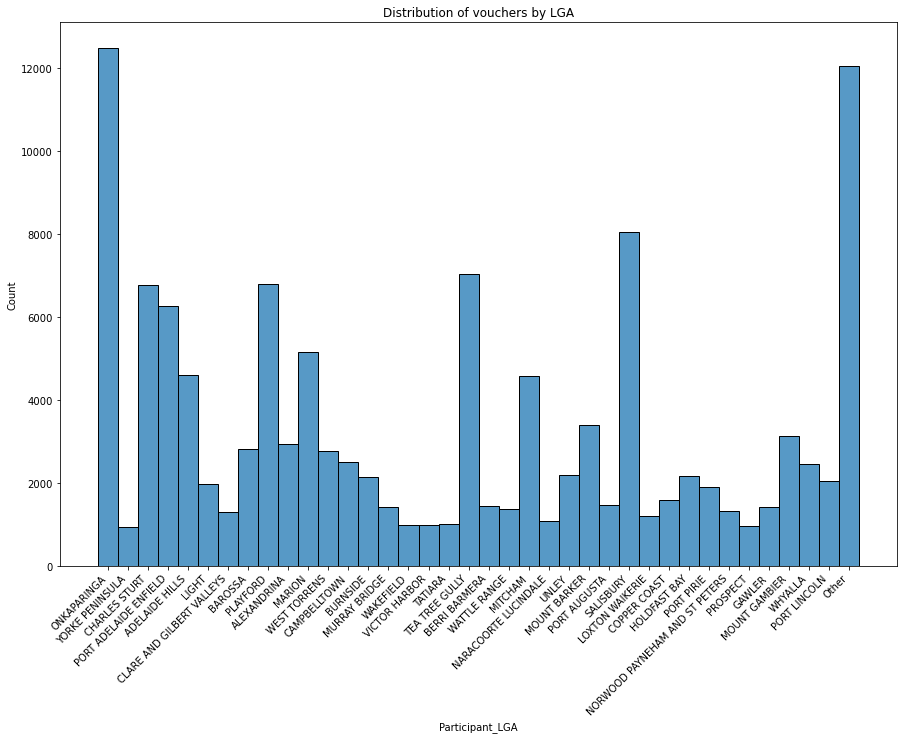

In [9]:
# Create new data frame with lowest 32 LGA's as "Other"
smallestDist = sa_vouchers_scores[sa_vouchers_scores.Participant_LGA.isin(binned.iloc[0].values[0])]
remainDist = pd.concat([smallestDist, sa_vouchers_scores]).drop_duplicates(keep=False)
smallestDist = smallestDist.assign(Participant_LGA='Other')
voucherDist = pd.concat([remainDist, smallestDist])

# Histogram to show distribtion 
plt.figure(figsize=(15,10))
plt.title('Distribution of vouchers by LGA')
ax = sns.histplot(voucherDist, x='Participant_LGA')
temp = plt.xticks(rotation=45, ha='right')

As seen above, the distribution of voucher use by LGA is not evenly spread. The notable LGA's are:

#### Regions:
* Onkaparinga 
* Salisbury
* Tea Tree Gully
* Playford
* Charles Sturt 

These regions apear to have the most vouchers claimed than others. The most noteworthy of these 5 is 'Onkaparinga' where their total voucher use is more than the lowest 32 LGA's combined in the 'Other' bin. 

# Sport Distribution

With the above voucher use distribution, the spread of selected sports can also be interesting. The following will analyise the distribution of sports selected by the whole state and determine if any sports are more popular than others.

The analysis is made with the same process as above, again with the least popular sports combined into a single bin named "Other". 

In [10]:
# Descriptive Statistics 
sportDist = sa_vouchers_scores.groupby(['Voucher_Sport']).Voucher_Sport.agg(Total_Vouchers='count')
sportDist.describe()

,Total_Vouchers
count,50.000000
mean,2550.520000
std,7724.130898
min,2.000000
25%,25.750000
50%,126.500000
75%,898.750000
max,47224.000000


In [11]:
# Binned by number of chosen sports 
bins = pd.cut(sportDist.Total_Vouchers, bins=30)
sportBinned = sa_vouchers_scores.join(bins, on='Voucher_Sport')
sportBinned = pd.DataFrame(sportBinned.groupby('Total_Vouchers').Voucher_Sport.unique())
sportBinned['Count'] = sportBinned['Voucher_Sport'].apply(lambda x: len(x))
sportBinned

,Voucher_Sport,Count
Total_Vouchers,,
"(-45.222, 1576.067]","[Golf, Surf Lifesaving, Fencing, Taekwondo, Ta...",40
"(1576.067, 3150.133]","[Calisthenics, Cricket, Hockey]",3
"(3150.133, 4724.2]","[Tennis, Athletics]",2
"(4724.2, 6298.267]",[Basketball],1
"(6298.267, 7872.333]",[],0
"(7872.333, 9446.4]",[],0
"(9446.4, 11020.467]",[Gymnastics],1
"(11020.467, 12594.533]",[],0
"(12594.533, 14168.6]",[],0


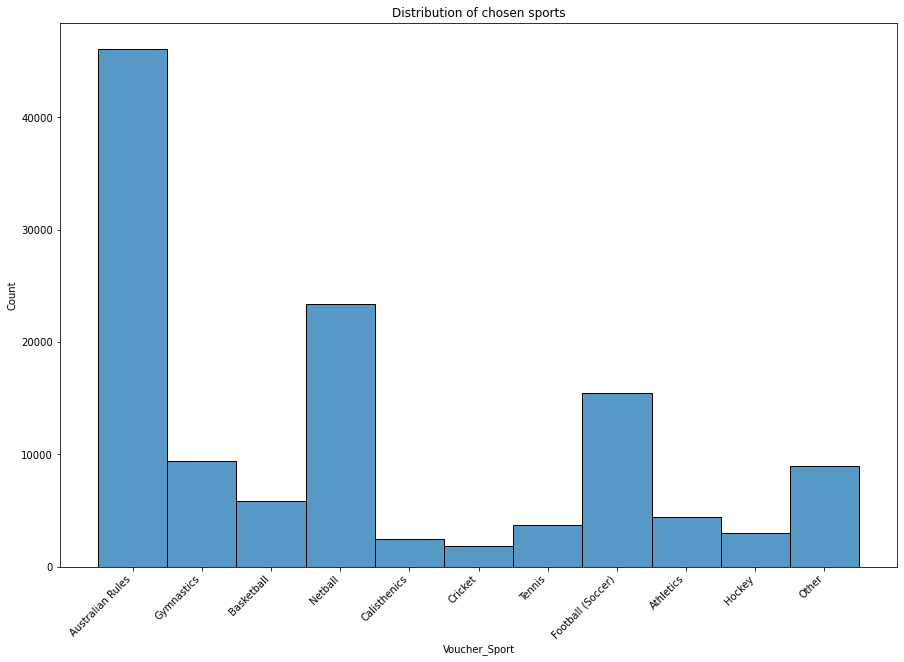

In [12]:
# Create new data frame with lowest 40 chosen sports as "Other"
smallestDist = sa_vouchers_scores[sa_vouchers_scores.Voucher_Sport.isin(sportBinned.iloc[0].values[0])]
remainDist = pd.concat([smallestDist, sa_vouchers_scores]).drop_duplicates(keep=False)
smallestDist = smallestDist.assign(Voucher_Sport='Other')
sportDist = pd.concat([remainDist, smallestDist])

#Histogram to show distribution
plt.figure(figsize=(15,10))
plt.title('Distribution of chosen sports')
ax = sns.histplot(sportDist, x='Voucher_Sport')
temp = plt.xticks(rotation=45, ha='right')

Based on the above graph. The following sports stand out: 

#### Sports: 
* Australian Rules 
* Netball 
* Football (Soccer)
* Gymnastics 
* Basket Ball

These sports apear to the most claimed vouchers than others, with Australian Rules having the most significant claims.

# Sport Distribution by LGA 

The bar plot below is used to show the distribution of chosen sports. This analysis is to determine if some sports are more popular in some LGA's than others. 

The bar plot is created by spliting the data frame by the top 5 sports and the top 5 LGA's by number of vouchers. The distribution is calculated by dividing the total number of vouchers claimed in the LGA by the chosen sport

In [13]:
# New data frame grouped by LGA and Voucher Sport then find total count
tempDF = sa_vouchers_scores.groupby(['Participant_LGA', 'Voucher_Sport']).Voucher_Sport.agg(Count='count')
tempDF = tempDF.pivot_table(index='Participant_LGA', columns='Voucher_Sport', values='Count')
tempDF = tempDF.loc[['ONKAPARINGA', 'CHARLES STURT', 'SALISBURY', 'TEA TREE GULLY', 'KANGAROO ISLAND']]
sportDist = tempDF[['Australian Rules', 'Netball', 'Football (Soccer)', 'Gymnastics', 'Basketball']]
tempDF = tempDF.drop(['Australian Rules', 'Netball', 'Football (Soccer)', 'Gymnastics', 'Basketball'], axis=1)
tempDF['Total'] = tempDF.sum(axis=1)
tempDF

Voucher_Sport,Archery,Athletics,BMX,Badminton,Baseball,Bowls,Calisthenics,Cricket,Cycling,Dancesport,...,Swimming,Table Tennis,Taekwondo,Tennis,Touch,Volleyball,Water Polo,Weightlifting,Wrestling,Total
Participant_LGA,,,,,,,,,,,,,,,,,,,,,
ONKAPARINGA,3.0,541.0,51.0,NaN,133.0,NaN,353.0,168.0,2.0,2.0,...,8.0,56.0,84.0,297.0,1.0,4.0,1.0,NaN,15.0,2571.0
CHARLES STURT,1.0,447.0,NaN,NaN,128.0,NaN,266.0,137.0,8.0,NaN,...,111.0,2.0,64.0,336.0,NaN,3.0,NaN,NaN,1.0,2186.0
SALISBURY,1.0,214.0,11.0,NaN,42.0,NaN,282.0,220.0,30.0,NaN,...,99.0,6.0,41.0,192.0,5.0,NaN,2.0,NaN,NaN,1553.0
TEA TREE GULLY,NaN,280.0,1.0,NaN,96.0,NaN,231.0,118.0,1.0,NaN,...,78.0,15.0,60.0,115.0,5.0,NaN,3.0,NaN,NaN,1266.0
KANGAROO ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0


In [14]:
# Display top 5 sports and all others in new column
sportDist['Others'] = tempDF['Total']
sportDist

Voucher_Sport,Australian Rules,Netball,Football (Soccer),Gymnastics,Basketball,Others
Participant_LGA,,,,,,
ONKAPARINGA,5258.0,2242.0,1204.0,1211.0,296.0,2571.0
CHARLES STURT,2147.0,584.0,917.0,807.0,256.0,2186.0
SALISBURY,2856.0,566.0,2069.0,763.0,362.0,1553.0
TEA TREE GULLY,2131.0,1068.0,1356.0,1114.0,284.0,1266.0
KANGAROO ISLAND,252.0,93.0,NaN,19.0,NaN,49.0


In [15]:
# Divide columns by Total indivdual sport count to get percentage of total sport  
sportDist = sportDist.div(sportDist.sum(axis=1), axis=0)
sportDist

Voucher_Sport,Australian Rules,Netball,Football (Soccer),Gymnastics,Basketball,Others
Participant_LGA,,,,,,
ONKAPARINGA,0.411360,0.175403,0.094195,0.094743,0.023158,0.201142
CHARLES STURT,0.311295,0.084674,0.132956,0.117007,0.037118,0.316949
SALISBURY,0.349614,0.069286,0.253275,0.093402,0.044314,0.190109
TEA TREE GULLY,0.295193,0.147943,0.187838,0.154315,0.039341,0.175371
KANGAROO ISLAND,0.610169,0.225182,NaN,0.046005,NaN,0.118644


In [16]:
sportDist = sportDist.transpose()
sportDist

Participant_LGA,ONKAPARINGA,CHARLES STURT,SALISBURY,TEA TREE GULLY,KANGAROO ISLAND
Voucher_Sport,,,,,
Australian Rules,0.411360,0.311295,0.349614,0.295193,0.610169
Netball,0.175403,0.084674,0.069286,0.147943,0.225182
Football (Soccer),0.094195,0.132956,0.253275,0.187838,NaN
Gymnastics,0.094743,0.117007,0.093402,0.154315,0.046005
Basketball,0.023158,0.037118,0.044314,0.039341,NaN
Others,0.201142,0.316949,0.190109,0.175371,0.118644


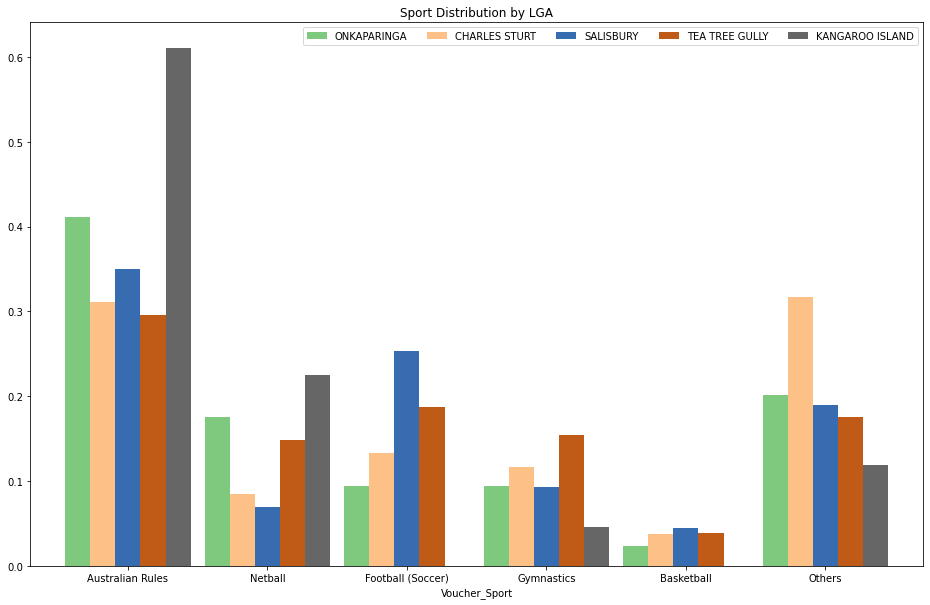

In [17]:
#Bar graph to display persentage of total chosen sports
ax = sportDist.plot.bar(width=0.9, figsize=(16, 10), cmap='Accent')
plt.xticks(rotation=0)
plt.title('Sport Distribution by LGA')
temp= ax.legend(ncol=len(sportDist.columns), bbox_to_anchor=(1,1), loc='upper right', fontsize='medium')

The bar graph above show that some sports are more popular than others in different LGA's. 

Most notably, Kangaroo Island has more voucher claims for Australian Rules and Netball than anyother LGA. Salisbury has the most claims for Soccer and Charles Sturt has the most for other sports 

# LGA Representation

The following analysis is to determine if any LGA's are under or over represented in their use of vouchers. 

The distribution is calculated by 

$ x = {LGA Population\over Total Population} $

$ Distribution = {x\over Total LGA Vouchers} $

In [18]:
# Group by LGA and calculate total LGA Voucher use 
voucherDist = sa_vouchers_scores.groupby(['Participant_LGA']).Voucher_Sport.agg(Total_Vouchers='count')
voucherDist = voucherDist.join(LGA_scores.Population, on='Participant_LGA')

# Total state population
totalPop = voucherDist.Population.sum()

# Calculate Voucher Distribution
voucherDist['Distribution'] = voucherDist.Population.div(totalPop)
voucherDist['Distribution'] = voucherDist.Distribution.div(voucherDist.Total_Vouchers, axis=0) * 10000

voucherDist

,Total_Vouchers,Population,Distribution
Participant_LGA,,,
ADELAIDE,302,19606.0,0.402679
ADELAIDE HILLS,4756,38601.0,0.050342
ADELAIDE PLAINS,899,NaN,NaN
ALEXANDRINA,2979,23693.0,0.049332
BAROSSA,2874,22174.0,0.047856
...,...,...,...
WEST TORRENS,2844,54932.0,0.119804
WHYALLA,2488,22070.0,0.055021
WUDINNA,267,1256.0,0.029178


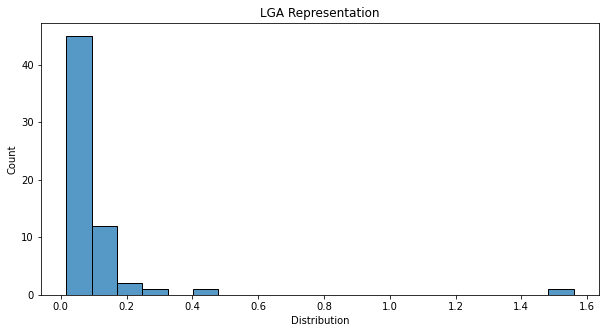

In [19]:
# Histogram for voucher distribution
plt.figure(figsize=(10,5))
sns.histplot(voucherDist.Distribution, bins=20)
temp = plt.title('LGA Representation')

In [20]:
# Distribution mean 
voucherDist.Distribution.mean()

0.10460763535544906

### Over Represented 

In [21]:
# Determine some over represented LGA's
voucherDist[voucherDist.Distribution < 0.03]

,Total_Vouchers,Population,Distribution
Participant_LGA,,,
KAROONDA EAST MURRAY,388,1035.0,0.016546
KIMBA,232,1087.0,0.029062
WUDINNA,267,1256.0,0.029178


### Under Represented

In [22]:
# Determine some under represented LGA's 
voucherDist[voucherDist.Distribution > 0.4]

,Total_Vouchers,Population,Distribution
Participant_LGA,,,
ADELAIDE,302,19606.0,0.402679
KINGSTON,288,72380.5,1.558856


As seen above, the analysis as shown that:

1. Karoonda East Murray, Kimba and Wudinna are over represented and;
2. Adelaide and Kingston are under represented 

# Voucher and SEIFA score relationships

To determine if an LGA's Voucher use is correlated to their SEIFA score, the following pair plots are used on various metrics obtained from the data. 

### By Popular Sports 

In [23]:
# Data frame by LGA and popular sports 
sportCount = sa_vouchers_scores.groupby(['Participant_LGA', 'Voucher_Sport']).Voucher_Sport.agg(Total_Count='count')
sportCount = sportCount.pivot_table(index='Participant_LGA', columns='Voucher_Sport', values='Total_Count')
sportCount = sportCount[['Australian Rules', 'Netball', 'Football (Soccer)', 'Gymnastics', 'Basketball' ]]
sportCount

Voucher_Sport,Australian Rules,Netball,Football (Soccer),Gymnastics,Basketball
Participant_LGA,,,,,
ADELAIDE,130.0,23.0,27.0,20.0,4.0
ADELAIDE HILLS,1412.0,1395.0,812.0,176.0,48.0
ADELAIDE PLAINS,485.0,160.0,93.0,18.0,15.0
ALEXANDRINA,980.0,860.0,510.0,86.0,204.0
BAROSSA,1196.0,445.0,197.0,117.0,341.0
...,...,...,...,...,...
WEST TORRENS,907.0,268.0,425.0,386.0,70.0
WHYALLA,569.0,509.0,268.0,154.0,605.0
WUDINNA,44.0,194.0,NaN,NaN,NaN


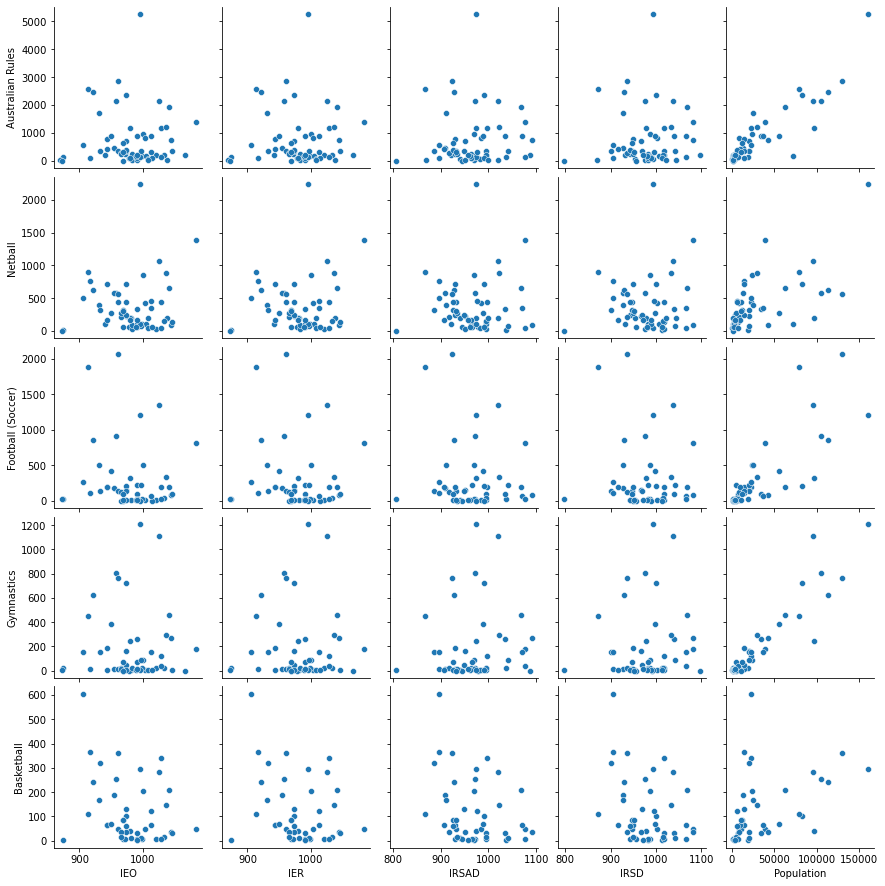

In [24]:
# Pair plot by popular sports and SEIFA scores 
voucherUse = sportCount.join(LGA_scores)
temp = sns.pairplot(voucherUse, x_vars=['IEO', 'IER', 'IRSAD', 'IRSD','Population'], 
                                y_vars= ['Australian Rules', 'Netball', 'Football (Soccer)', 'Gymnastics', 'Basketball'])

### By Other Various Data Characteristics

In [25]:
# Data frame by various LGA data characteristics 
voucherUse = voucherDist.copy()
voucherUse['Male_Total'] = sa_vouchers_scores.groupby(['Participant_LGA'])['Participant_Sex'].apply(lambda x: x[x == 'Male'].count())
voucherUse['Female_Total'] = sa_vouchers_scores.groupby(['Participant_LGA'])['Participant_Sex'].apply(lambda x: x[x == 'Female'].count())
voucherUse['Previous_Reg'] = sa_vouchers_scores.groupby(['Participant_LGA'])['Club_Previous_Member'].apply(lambda x: x[x == 'Registered Previously'].count())
voucherUse['No_Previous_Reg'] = sa_vouchers_scores.groupby(['Participant_LGA'])['Club_Previous_Member'].apply(lambda x: x[x == 'Not Registered Previously'].count())
voucherUse['ATSI_Count'] = sa_vouchers_scores.groupby(['Participant_LGA'])['Participant_ATSI_Indicator'].apply(lambda x: x[x == 'ATSI'].count())
voucherUse['CALD_Count'] = sa_vouchers_scores.groupby(['Participant_LGA'])['Participant_CALD_Indicator'].apply(lambda x: x[x == 'CALD'].count())
voucherUse['ATSI_%'] = (voucherUse.ATSI_Count / voucherUse.Population)
voucherUse['CALD_%'] = (voucherUse.CALD_Count / voucherUse.Population)

#remove Population as it is joined again by LGA_scores 
voucherUse = voucherUse.drop('Population', axis=1)

voucherUse

,Total_Vouchers,Distribution,Male_Total,Female_Total,Previous_Reg,No_Previous_Reg,ATSI_Count,CALD_Count,ATSI_%,CALD_%
Participant_LGA,,,,,,,,,,
ADELAIDE,302,0.402679,187,115,135,167,8,44,0.000408,0.002244
ADELAIDE HILLS,4756,0.050342,2522,2234,3078,1678,39,220,0.001010,0.005699
ADELAIDE PLAINS,899,NaN,557,342,479,420,24,13,NaN,NaN
ALEXANDRINA,2979,0.049332,1605,1374,1644,1335,73,58,0.003081,0.002448
BAROSSA,2874,0.047856,1742,1132,1879,995,23,52,0.001037,0.002345
...,...,...,...,...,...,...,...,...,...,...
WEST TORRENS,2844,0.119804,1664,1180,1537,1307,75,384,0.001365,0.006990
WHYALLA,2488,0.055021,1203,1285,1714,774,191,130,0.008654,0.005890
WUDINNA,267,0.029178,64,203,173,94,0,1,0.000000,0.000796


In [26]:
# Join new data frame with LGA_scores 
voucherUse = voucherUse.join(LGA_scores)
voucherUse

,Total_Vouchers,Distribution,Male_Total,Female_Total,Previous_Reg,No_Previous_Reg,ATSI_Count,CALD_Count,ATSI_%,CALD_%,IEO,IER,IRSAD,IRSD,Population
Participant_LGA,,,,,,,,,,,,,,,
ADELAIDE,302,0.402679,187,115,135,167,8,44,0.000408,0.002244,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,4756,0.050342,2522,2234,3078,1678,39,220,0.001010,0.005699,1083.0,1083.0,1077.0,1081.0,38601.0
ADELAIDE PLAINS,899,NaN,557,342,479,420,24,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALEXANDRINA,2979,0.049332,1605,1374,1644,1335,73,58,0.003081,0.002448,1000.0,1000.0,969.0,987.0,23693.0
BAROSSA,2874,0.047856,1742,1132,1879,995,23,52,0.001037,0.002345,1028.0,1028.0,997.0,1017.0,22174.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WEST TORRENS,2844,0.119804,1664,1180,1537,1307,75,384,0.001365,0.006990,949.0,949.0,989.0,998.0,54932.0
WHYALLA,2488,0.055021,1203,1285,1714,774,191,130,0.008654,0.005890,905.0,905.0,897.0,905.0,22070.0
WUDINNA,267,0.029178,64,203,173,94,0,1,0.000000,0.000796,1008.0,1008.0,999.0,1023.0,1256.0


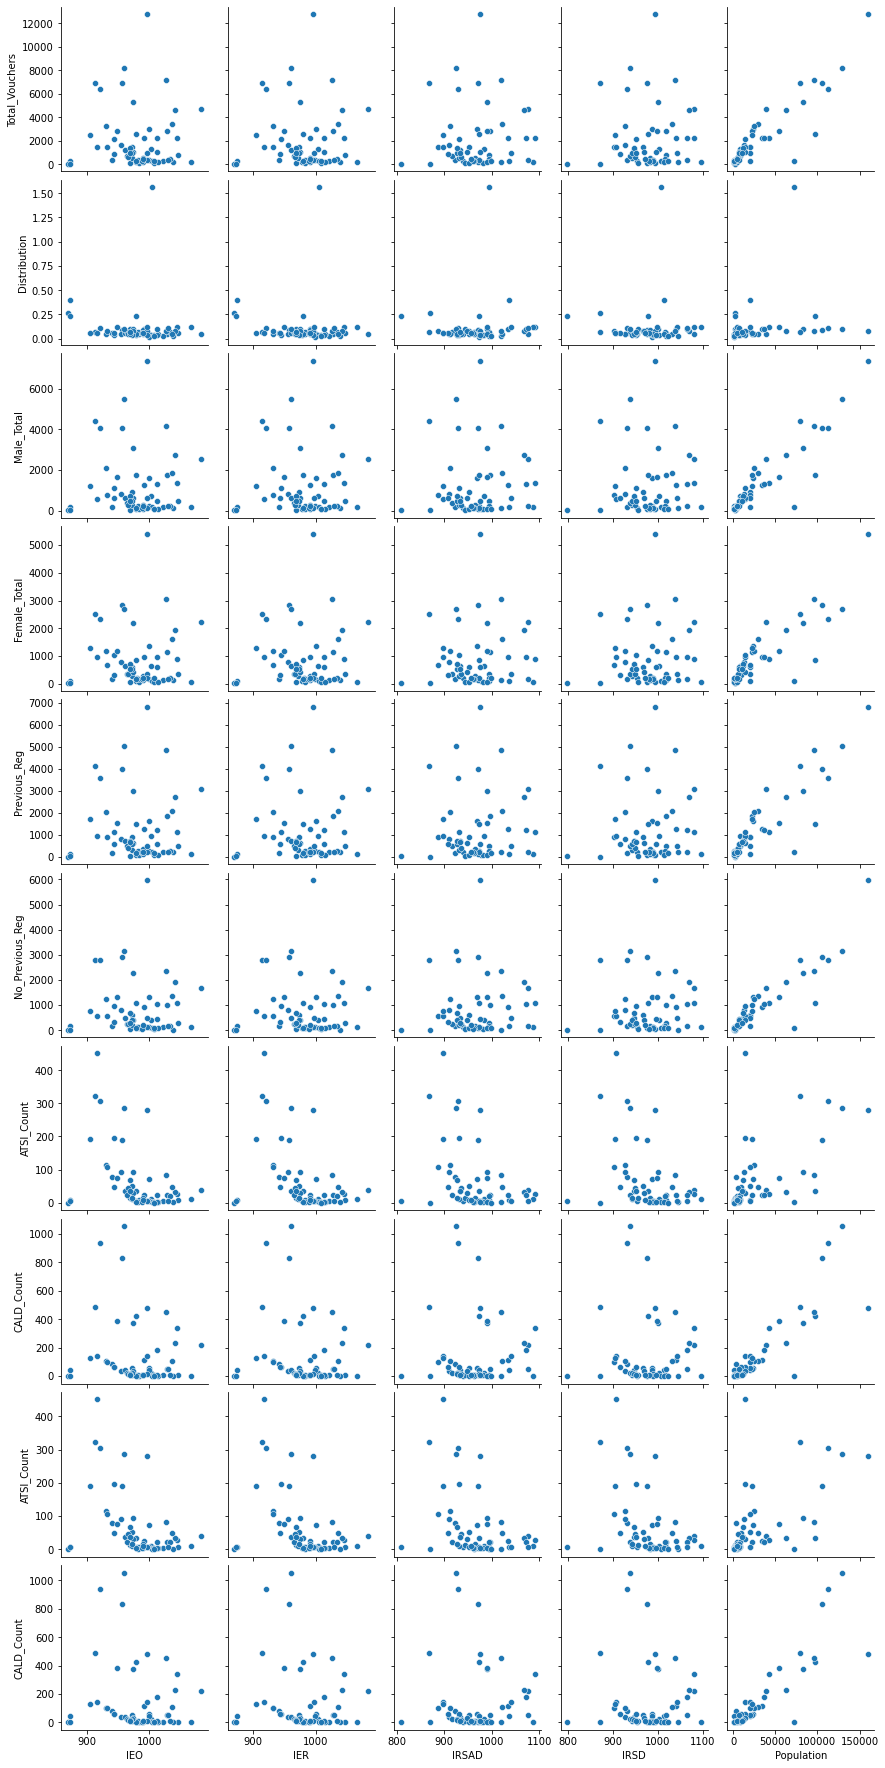

In [27]:
# Pair plot by new data and SEIFA scores 
temp = sns.pairplot(voucherUse, y_vars=['Total_Vouchers', 'Distribution', 'Male_Total', 'Female_Total', 'Previous_Reg', 
                                 'No_Previous_Reg', 'ATSI_Count', 'CALD_Count', 'ATSI_Count', 'CALD_Count'], 
                                x_vars=['IEO', 'IER', 'IRSAD', 'IRSD','Population'])

As per the above, there apears to be no meaningful relationship between LGA voucher use and their SEIFA scores. 

Notabley the only relationship apears to be 'Population' this is not a SEIFA score 

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [28]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [29]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()

<ipython-input-29-d688531e2bfc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()


,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0


In [30]:
qld_vouchers_scores.columns = qld_vouchers_scores.columns.str.replace(' ','_')
qld_vouchers_scores.head()

,Application_Number,Voucher_Number,Child_Age_(at_time_of_Application),Gender,Has_your_child_played_sport_before?,Participation_Activity,Club_Name,Club_Suburb/Town,Club_Local_Government_Area_Name,Club_State_Electoral_District__Name,Parent_Suburb/Town,Total_Payment,LGA,IEO,IER,IRSAD,IRSD,Population
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0


### Number of LGA's and Sports

In [31]:
LGA_count = [len(set(sa_vouchers_scores.Participant_LGA)), len(set(qld_vouchers_scores['Club_Local_Government_Area_Name']))]
sport_count = [len(set(sa_vouchers_scores.Voucher_Sport)), len(set(qld_vouchers_scores['Participation_Activity']))]
comp_count = {'LGA Count': LGA_count, 'Sport Count': sport_count} 
temp_df = pd.DataFrame(comp_count, index=['SA', 'QLD'])
temp_df

,LGA Count,Sport Count
SA,69,50
QLD,47,66


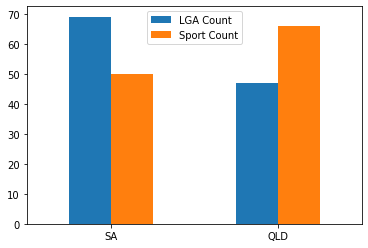

In [32]:
ax = temp_df.plot.bar()
temp = plt.xticks(rotation=0)

### Total Voucher Claims

In [33]:
SAclaims = len(sa_vouchers_scores)
QLDclaims = len(qld_vouchers_scores)
print('SA Voucher Claims: ', SAclaims)
print('QLD Voucher Claims: ', QLDclaims)

SA Voucher Claims:  127526
QLD Voucher Claims:  9507


As per the above, South Australia has more voucher claims than that of Queensland 

### Average SEIFA Scores

In [34]:
SEIFA = pd.DataFrame(sa_vouchers_scores[['IEO', 'IER', 'IRSAD', 'IRSD']].mean().to_frame())
SEIFA = SEIFA.rename(columns={0: 'SA'})
SEIFA['QLD'] = qld_vouchers_scores[['IEO', 'IER', 'IRSAD', 'IRSD']].mean().to_frame()
SEIFA

,SA,QLD
IEO,981.049942,1003.907321
IER,981.049942,1003.907321
IRSAD,971.090416,996.992101
IRSD,981.756314,999.869381


### Per Capita's

In [35]:
SAclaims = len(sa_vouchers_scores) / totalPop
QLDclaims = len(qld_vouchers_scores) / qld_vouchers_scores.Population.sum(axis=0)*60
print('SA Voucher Claims: ', SAclaims)
print('QLD Voucher Claims: ', QLDclaims)

SA Voucher Claims:  0.07909984738392603
QLD Voucher Claims:  0.00015942989893923676


As seen above, South Australia has a much higher per capita usage of vouchers than QLD. This could be from the lower SEIFA score from South Australia or potentially other reasons.

In [36]:
# Descriptive Statistics 
QLDsportDist = qld_vouchers_scores.groupby(['Participation_Activity'])['Participation_Activity'].agg(Total_Vouchers='count')
QLDsportDist.describe()

,Total_Vouchers
count,66.000000
mean,144.045455
std,452.426736
min,1.000000
25%,3.000000
50%,9.000000
75%,39.250000
max,2782.000000


In [37]:
bins = pd.cut(QLDsportDist.Total_Vouchers, bins=30)
QLDsportDist = qld_vouchers_scores.join(bins, on='Participation_Activity')
QLDsportDist = pd.DataFrame(QLDsportDist.groupby('Total_Vouchers')['Participation_Activity'].unique())
QLDsportDist['Count'] = QLDsportDist['Participation_Activity'].apply(lambda x: len(x))
QLDsportDist

,Participation_Activity,Count
Total_Vouchers,,
"(-1.781, 93.7]","[*Other, Archery, Baseball, BMX Bicycle Motocr...",53
"(93.7, 186.4]","[Athletics, Bushwalking, Pony Club, Swimming, ...",5
"(186.4, 279.1]",[Hockey],1
"(279.1, 371.8]",[Rugby Union],1
"(371.8, 464.5]",[Basketball],1
"(464.5, 557.2]","[Australian Football, Gymnastics]",2
"(557.2, 649.9]",[],0
"(649.9, 742.6]",[],0
"(742.6, 835.3]",[],0


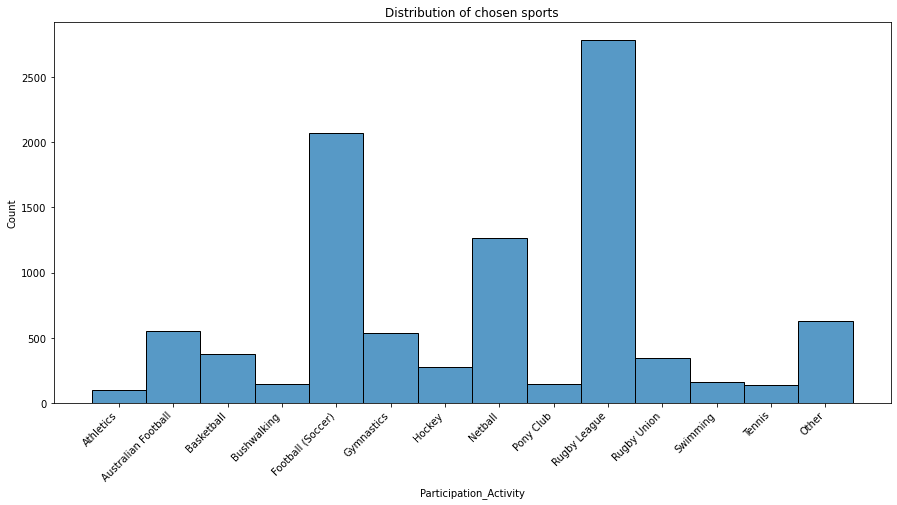

In [38]:
# Create new data frame with lowest 40 chosen sports as "Other"
smallestDist = qld_vouchers_scores[qld_vouchers_scores['Participation_Activity'].isin(QLDsportDist.iloc[0].values[0])]
remainDist = pd.concat([smallestDist, qld_vouchers_scores]).drop_duplicates(keep=False)
smallestDist = smallestDist.assign(Participation_Activity='Other')
QLDvoucherDist = pd.concat([remainDist, smallestDist])

#Histogram to show distribution
plt.figure(figsize=(15,7))
plt.title('Distribution of chosen sports')
ax = sns.histplot(QLDvoucherDist, x='Participation_Activity')
temp = plt.xticks(rotation=45, ha='right')

In [39]:
df_scaled = MinMaxScaler()
QLDsportDist_Normed = QLDvoucherDist.groupby(['Participation_Activity'])['Participation_Activity'].agg(QLD='count')
QLDsportDist_Normed = pd.DataFrame(df_scaled.fit_transform(QLDsportDist_Normed), index=QLDsportDist_Normed.index, 
                                   columns=QLDsportDist_Normed.columns)
QLDsportDist_Normed

,QLD
Participation_Activity,
Athletics,0.000000
Australian Football,0.167970
Basketball,0.103911
Bushwalking,0.018622
Football (Soccer),0.736313
Gymnastics,0.164618
Hockey,0.064804
Netball,0.434264
Other,0.198138


In [40]:
sportDist = sa_vouchers_scores.groupby(['Voucher_Sport']).Voucher_Sport.agg(Total_Vouchers='count')

In [41]:
# Binned by number of chosen sports 
bins = pd.cut(sportDist.Total_Vouchers, bins=30)
sportBinned = sa_vouchers_scores.join(bins, on='Voucher_Sport')
sportBinned = pd.DataFrame(sportBinned.groupby('Total_Vouchers').Voucher_Sport.unique())
sportBinned['Count'] = sportBinned['Voucher_Sport'].apply(lambda x: len(x))

In [42]:
# Create new data frame with lowest 40 chosen sports as "Other"
smallestDist = sa_vouchers_scores[sa_vouchers_scores.Voucher_Sport.isin(sportBinned.iloc[0].values[0])]
remainDist = pd.concat([smallestDist, sa_vouchers_scores]).drop_duplicates(keep=False)
smallestDist = smallestDist.assign(Voucher_Sport='Other')
sportDist = pd.concat([remainDist, smallestDist])

In [43]:
df_scaled = MinMaxScaler()
sportDist_Normed = sportDist.groupby('Voucher_Sport').Voucher_Sport.agg(SA='count')
sportDist_Normed = pd.DataFrame(df_scaled.fit_transform(sportDist_Normed), index=sportDist_Normed.index, 
                                   columns=sportDist_Normed.columns)
sportDist_Normed

,SA
Voucher_Sport,
Athletics,0.058406
Australian Rules,1.000000
Basketball,0.091155
Calisthenics,0.014387
Cricket,0.000000
Football (Soccer),0.307548
Gymnastics,0.171651
Hockey,0.026019
Netball,0.486155


<Figure size 1080x504 with 0 Axes>

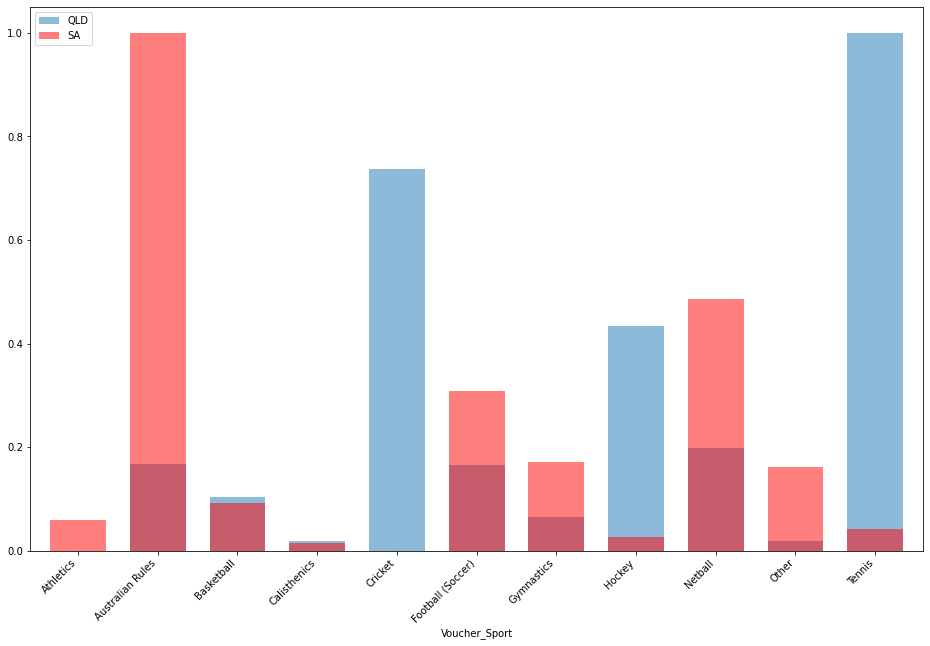

In [44]:
plt.figure(figsize=(15,7))

ax = QLDsportDist_Normed.plot.bar(width=0.7, figsize=(16, 10), alpha=0.5)
sportDist_Normed.plot.bar(width=0.7, figsize=(16, 10), ax=ax, color='red', alpha=0.5)
temp = plt.xticks(rotation=45, ha='right')

As seen above, some state's prefer certain sports over another. Notably:

- Australian Rules is highly favoured in South Australia
- Tennis in preferred in Queensland 
- Hockey has the majority of claims in Queensland

# Conclusion 

The data analysis has proven useful in analysing the sport voucher claims for South Australia. The analysis proved to bring to light some notable facts about voucher use in South Australia: 

1. Onkaparinga, Salisbury, Tea Tree Gully, Playford, Charles Sturt all had the most voucher claims 
2. Australian Rules, Netball, Football (Soccer), Gymnastics, Basket Ball are the most favoured sports claimed with vouchers in South Australia
3. Different sports are preferred in different LGA's 
4. The analysis determined that some LGA's are over and under represented 
5. There is not clear relationship between LGA voucher use and SEIFA scores 

This analysis also determined that QLD had less voucher claims than SA, QLD's SEFIA score are higher than that of SA and that both states prefer different sports than the other. 